**Project 3: Zips Law distribution**

This project investigates various facets of the Zips law and how it can be empirically tested on a set of well-known corpuses. We want to compare the various corpus developed at different time period.

1.	Consider the corpus of old English poetry that you can download from The York-Helsinki parsed corpus of Old English poetry (YCOEP). You can inspire from links provided in description of Project 1, to i) Write a program that displays in the log-scale, the frequency of words versus the ranking; ii) Display the plot together with its linear fit and the 90% confidence bounds and provide an estimation of the linear curve parameter, corresponding to the parameters of the Zipf’s law; iii) Write a script and estimate the percentage of tokens that do not fall within the 90% bounds.

In [13]:
import nltk
import matplotlib.pylab as plt
import numpy as np
import scipy

from collections import Counter
reader = nltk.corpus.reader.BracketParseCorpusReader("./2425", ".*", encoding="latin-1")
path = "./2425"

The fitted straight line has equation y = -0.87x + 3.53


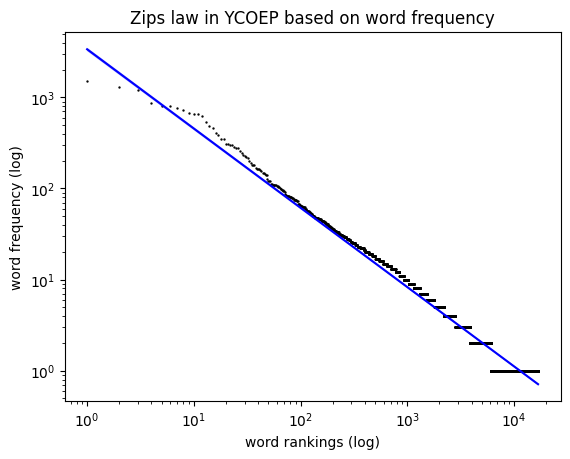

Tokens that are not between the 90% confidence limits: 99.05%


In [14]:
# Gets words from YCOEP corpus and filters unwanted tags
#Task 1
# returns words
def get_words_YCOEP(path):
    reader = nltk.corpus.reader.BracketParseCorpusReader(path, ".*")
    filter_these =["CODE", "ID", ".", ","]
    taggedwords = reader.tagged_words()
    filteredtaggedwords = []
    
    for i in taggedwords:
        if i[1] in filter_these or i[0].startswith("*") or i[0]=="0":
            pass
        else:
            filteredtaggedwords.append((i[0].lower(), i[1]))
    return filteredtaggedwords

# Counts occurance of the word
# returns sorted tupple list
def rank_words_occurance(words):
    x = (Counter((i[0] for i in words)))
    x = x.most_common()
    return x

# creates lists from tuple lists
def rwords_to_lists(words):
    x = []
    y = []
    word_list = []
    i = 1
    for item in words:
        temp1, temp2 = item
        word_list.append(temp1)
        y.append(temp2)
        x.append(i)
        i = i + 1
    return x,y,word_list

# draws logscale figure
def draw_log_scale(rankings,occurance): 
    plt.yscale("log")
    plt.xscale("log")
    plt.plot(rankings, occurance, color='black')
    plt.show()

def draw_log_scale_reg_ci(rankings,occurance,label):
    x = np.array(rankings)
    y = np.array(occurance)
    p = np.polyfit(np.log10(x), np.log10(y) ,deg = 1)
    b = p[0] # gradient
    a = p[1] # y-intercept)
    print(f'The fitted straight line has equation y = {b:.2f}x {a:=+6.2f}')
    xseq = np.linspace(1, len(rankings),len(rankings))
    plt.yscale("log")
    plt.xscale("log")
    n, m = y.size, p.size # koko, parametetrit
    dof = n - m # vapausasteet
    alpha = 0.10 # alpha
    tails = 2 # hännät
    t_critical = scipy.stats.t.ppf(1 - (alpha / tails), dof)  # t-arvo
    y_model = np.poly1d(p) # malli
    y_fitted = y_model(np.log10(x))
    y_bar = np.mean(np.log10(y)) #  log10 y keskiarvo
    x_bar = np.mean(np.log10(x)) # log10 x keskiarvo
    resid = np.log10(y) - y_fitted # residuaalit
    std_err = np.sqrt(sum(resid**2) / dof) # keskivirhe
    plt.scatter( (x), (y), color ="black", label = r"Original data", marker=".",s=1.9)
    plt.plot(xseq, 10**y_fitted, c = "blue", label = r"Linear regression")
    ci = t_critical * std_err * np.sqrt(1 / n + (np.log10(x) - x_bar)**2 / (np.sum((np.log10(x) - x_bar)**2)))
    plt.fill_between(xseq, (10**(y_fitted + ci)),(10**(y_fitted - ci)),color='blue',alpha=0.25)
    plt.xlabel("word rankings (log)")
    plt.ylabel(f"word {label[0]} (log)")
    plt.title(f"Zips law in {label[1]}")
    plt.show()   
    
    count = 0
    for i in range(1,len(y)):
        if ((10**(y_fitted[i-1] - ci[i-1])) <= (y[i-1]) <= (10**(y_fitted[i-1] + ci[i-1]))):
            count = count + 1
    o_bounds = (1-count/len(y))*100
    print(f"Tokens that are not between the 90% confidence limits: {o_bounds:.2f}%")
    
path = "./2425"
words1 = get_words_YCOEP(path)

ranked_words = rank_words_occurance(words1)
x,y,words = rwords_to_lists(ranked_words)
ylab = ["frequency", "YCOEP based on word frequency"]
draw_log_scale_reg_ci(x,y,ylab)



2.	Repeat 1) when considering the length of tokens used in the corpus. 

The fitted straight line has equation y = -0.28x + 1.88


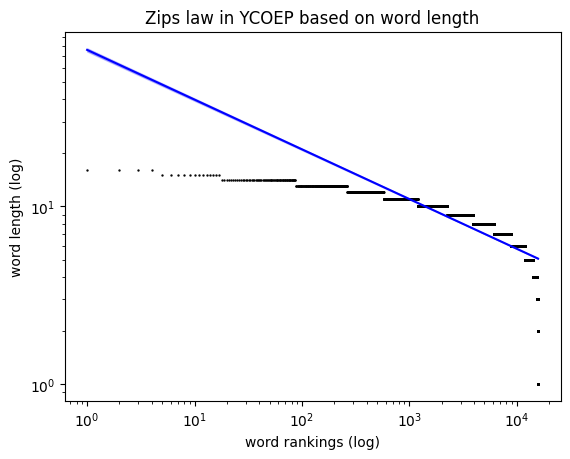

Tokens that are not between the 90% confidence limits: 99.32%


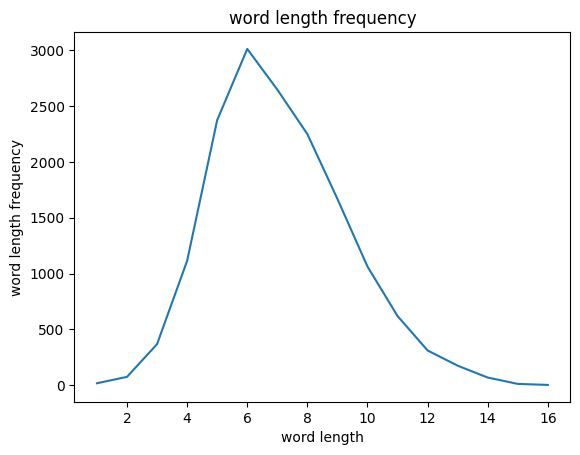

The fitted straight line has equation y = -2.19x + 4.31


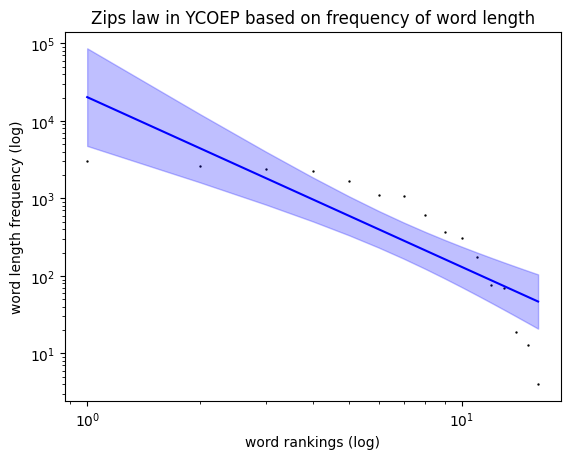

Tokens that are not between the 90% confidence limits: 68.75%


In [15]:
#2 code
def rank_words_length(words):
    temp = []
    for item in words:   
        #word monðwærust(10) in corpus $mon+dw+arust(13)
        #-> monðwærust(10) -> mondwarust(10)           
        item2 = item[0].replace("+", "").replace("$", "")
        if item2 not in temp:
            temp.append(item2)
    temp = sorted(temp, key=len, reverse=True)
    x=[]
    y=[]
    i=1
    for word in temp:
        y.append(len(word))
        x.append(i)
        i=i+1
    return x,y,temp

x2,y2,words2 = rank_words_length(words1)
ylabel2 = ["length", "YCOEP based on word length"]
draw_log_scale_reg_ci(x2,y2,ylabel2)


def rank_words_length2(words):
    temp = []
    for item in words:   
        #word monðwærust(10) in corpus $mon+dw+arust(13)
        #-> monðwærust(10) -> mondwarust(10)           
        item2 = item[0].replace("+", "").replace("$", "")
        if item2 not in temp:
            temp.append(item2)
    temp = sorted(temp, key=len, reverse=True)
    x=[]
    y=[]
    z=[]
    i=1
    for word in temp:
        if not y:
            y.append(len(word))
            z.append(1)
        elif len(word) not in y:
            y.append(len(word))
            z.append(1)
        else:
            z[y.index(len(word))] = z[y.index(len(word))] + 1
    #print(y)
    #print(z)
    plt.plot(y,z)
    plt.xlabel("word length")
    plt.ylabel(f"word length frequency")
    plt.title(f"word length frequency")
    plt.show()
    
    
    z = sorted(z, reverse=True)
    x = np.linspace(1, len(z),len(z))
    #print(x)
    #print(z)
    
    return x,z,temp
x2,y2,words2 = rank_words_length2(words1)
ylabel2 = ["length frequency", "YCOEP based on frequency of word length"]
draw_log_scale_reg_ci(x2,y2,ylabel2)

3.	We want to explore the syntactic / stylistic patterns of the poem. For this purpose, for each line of poem, write a script that outputs the most frequent tag and the less frequent tag. Save the result in an excel file. Then compute the tag-coherence of the poem. This is computed as the proportion of the most common frequent tag across all lines of the poem for frequent-tags, and the proportion of the most common less-frequent tag across all lines for less frequent tag. In other words, you should provide tag-coherence in two dimensions (less-frequent tag and most frequent tag). Suggest a plot where you display the various tags (less-frequent tag, and another one for most frequent tag). Note that in the case where most frequent or less frequent yields more than one output, this should be taken into account in the calculus of the intersection (common tags across all lines).

The fitted straight line has equation y = -1.93x + 4.04


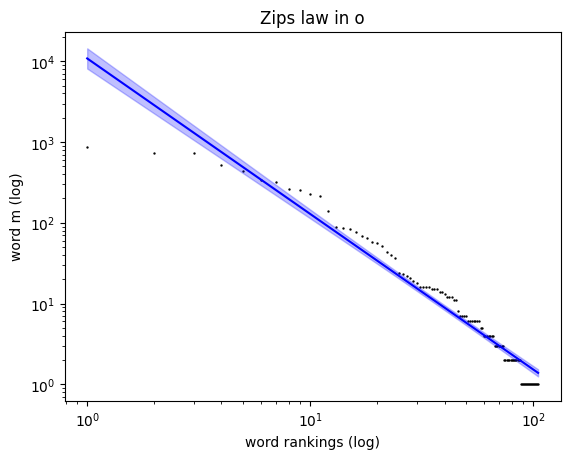

Tokens that are not between the 90% confidence limits: 82.86%
The fitted straight line has equation y = -1.70x + 3.95


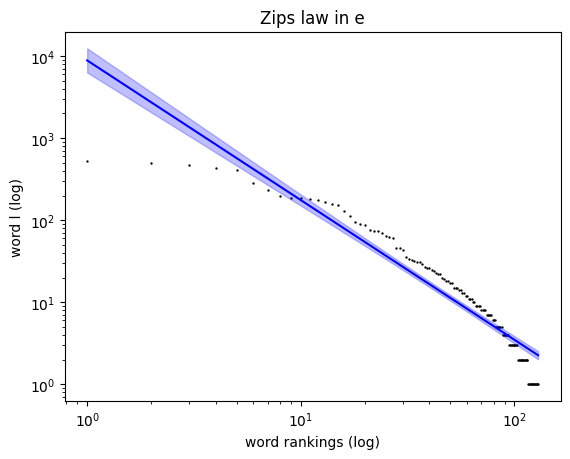

Tokens that are not between the 90% confidence limits: 89.92%


In [16]:
#task 3
def get_sentences_YCOEP(path):
    reader = nltk.corpus.reader.BracketParseCorpusReader(path, ".*")
    filter_these = ["CODE", "ID", ".", ","]
    taggedsentences = reader.tagged_sents()
    filteredsentences = []
    for sentence in taggedsentences:
        filteredsentence = []
        for taggedword in sentence:
            if taggedword[1] in filter_these or taggedword[0].startswith("*") or taggedword[0]=="0":
                pass
            else:
                filteredsentence.append(taggedword)
        if len(filteredsentence) >= 1:
            filteredsentences.append(filteredsentence)
    return filteredsentences

def get_tag_frequencies(sentences):
    mostfrequent = []
    leastfrequent = []
    for sentence in sentences:
        x = (Counter((i[1] for i in sentence)))
        ordered  = x.most_common()
        highestfreq = ordered[0][1]
        lowestfreq = ordered[-1][1]
        mostfrequent.append([tag[0] for tag in ordered if tag[1]==highestfreq])
        leastfrequent.append([tag[0] for tag in ordered if tag[1]==lowestfreq])
    return(mostfrequent, leastfrequent)

def get_tag_coherence(tagfreqlist):
    numofsent = len(tagfreqlist)
    flatlist = []
    for i in tagfreqlist:
        for j in i:
            flatlist.append(j)
    x = Counter(flatlist)
    ordered = x.most_common()
    percentages = []
    for i in ordered:
        percentages.append((i[0], i[1]/numofsent))
    return(ordered, percentages)

def draw_coherenceplot(percentages, freqtype): 
    x = []
    y = []
    for i in percentages:
        x.append(i[0])
        y.append(i[1])
    plt.plot(x[0:1000], y[0:1000], color='black')
    plt.title("{freqtype} Frequent Pairs of Tags".format(freqtype = freqtype))
    plt.xlabel("Pair of tags")
    plt.ylabel("Percentage of sentences where pair of tags is {freqtype} common".format(freqtype = freqtype))
    ax = plt.gca()
    ax.set_xticks(ax.get_xticks()[::50])
    plt.xticks(fontsize=7, rotation=90)
    plt.show()

sentences = get_sentences_YCOEP(path)
mostfreq, leastfreq = get_tag_frequencies(sentences)

ranked = rank_words_occurance(mostfreq)
tagx, tagy, wl = rwords_to_lists(ranked)
draw_log_scale_reg_ci(tagx,tagy, "most frequent tag occurrence")

ranked = rank_words_occurance(leastfreq)
tagx, tagy, wl = rwords_to_lists(ranked)
draw_log_scale_reg_ci(tagx,tagy, "least frequent tag occurrence")


4.	Repeat 3) when exploring the first and last line of each token of the line of the poem (after excluding any stopword).

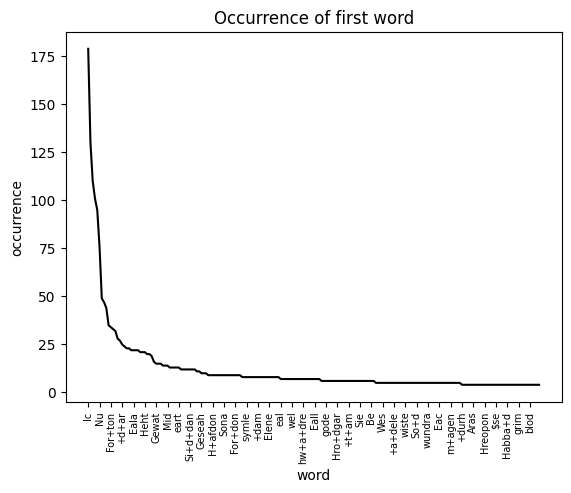

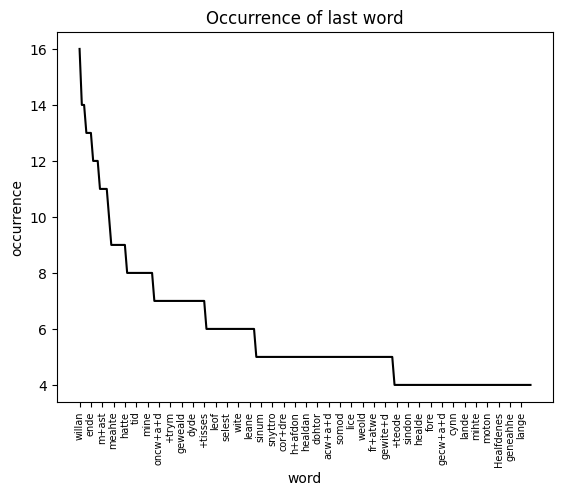

The fitted straight line has equation y = -1.44x + 3.60


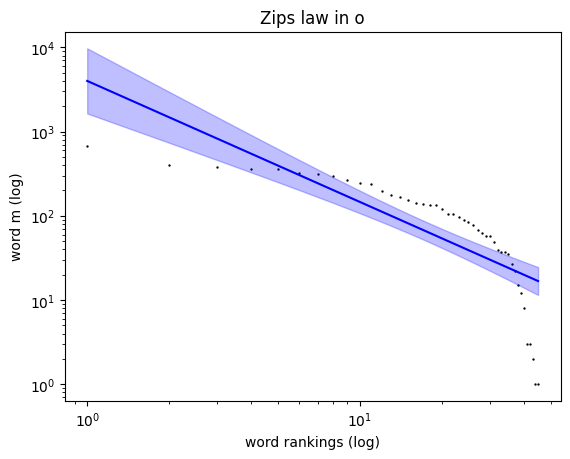

Tokens that are not between the 90% confidence limits: 86.67%
The fitted straight line has equation y = -2.18x + 4.16


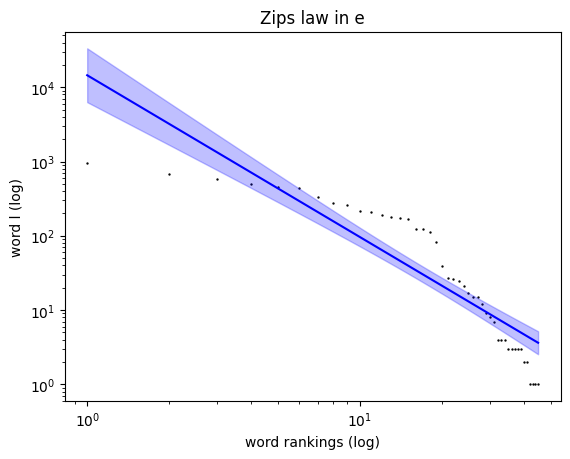

Tokens that are not between the 90% confidence limits: 84.44%


In [17]:
#task4
def first_and_last_words(sentences):
    stop_words = [i[0] for i in ranked_words[0:100]]
    firstwords = []
    lastwords = []
    for sentence in sentences:
        sentwithstopwordsremoved = []
        for word in sentence: 
            if word[0] in stop_words:
                pass
            else:
                sentwithstopwordsremoved.append(word)
        if len(sentwithstopwordsremoved) >= 1:
            firstwords.append(sentwithstopwordsremoved[0][0])
            lastwords.append(sentwithstopwordsremoved[-1][0])
    return(firstwords, lastwords)

def plot_first_last(words, lastorfirst): 
    counts = Counter(words)
    ordered = counts.most_common()
    x = []
    y = []
    for i in ordered:
        x.append(i[0])
        y.append(i[1])
    plot = plt.plot(x[0:200], y[0:200], color='black')
    plt.title("Occurrence of {type} word".format(type = lastorfirst))
    plt.xlabel("word")
    plt.ylabel("occurrence")
    ax = plt.gca()
    ax.set_xticks(ax.get_xticks()[::5])
    plt.xticks(fontsize=7, rotation=90)
    plt.show()

firstwords, lastwords = first_and_last_words(sentences)
plot_first_last(firstwords, "first")
plot_first_last(lastwords, "last")

ranked = rank_words_occurance(firstwords)
tagx, tagy, wl = rwords_to_lists(ranked)
draw_log_scale_reg_ci(tagx,tagy, "most frequent tag occurrence")

ranked = rank_words_occurance(lastwords)
tagx, tagy, wl = rwords_to_lists(ranked)
draw_log_scale_reg_ci(tagx,tagy, "least frequent tag occurrence")



5.	Write a script that uses WordNet lexical database to count the number of homonyms in each line of poem, and draw histogram that shows the distribution of number of homonyms in poem lines. Draw another histogram illustrating the histogram of the tags associated to homonym word.

In [18]:
#5.1 code
import ety
import pandas
from nltk.corpus import words
from nltk.corpus import wordnet as wn


# Clean old english sentences
def clean_old_sentences(sents):
    new_sentences = []
    for sentence in sents:
        temp_sent = []
        for word in sentence:
            temp_sent.append([word[0].replace("+", "").replace("$", "").lower(),word[1]])
        new_sentences.append(temp_sent)
    return new_sentences


#get word pairs eng <-> Old English, Middle English or other
#get only one origin for the word
def get_modern_sentences(clean_sentences):
    word_list = words.words()
    modern_and_old = []
    for i in word_list:
        temp2 = []
        for j in ety.origins(str(i)):
            temp2.append(j)
        temp3 = []
        for item in temp2:
            if "Old English" in str(item):
                    temp3 = str(item).split()
                    break
            elif "Middle" in str(item):
                temp3 = str(item).split()
            elif temp2[temp2.index(item)] == temp2[-1] and len(temp3) < 1:
                temp3 = str(item).split()
        try:
            temp = temp3[0].lower()
            for c in temp:
                if ord(c) == 230 or ord(c) == 198:
                    temp=list(temp)
                    temp[temp.index(c)] = "a"
                    temp ="".join(temp)
                elif ord(c) == 254:
                    temp=list(temp)
                    temp[temp.index(c)] = "t"
                    temp ="".join(temp)
                elif ord(c) == 240:
                    temp=list(temp)
                    temp[temp.index(c)] = "d"
                    temp ="".join(temp)
        except:
            pass
        try:
            modern_and_old.append([temp3[0],i])
        except:
            pass
        modern_sentences = []
        h=0
        known_translations = []
        for sentence in clean_sentences:
            temp_sentence = []   
            for word in sentence:
                ok = False

                for translation in known_translations:
                    if word == translation[0]:
                        temp_sentence.append(translation[1])
                        ok = True
                        break
                if not ok:
                    m = word[0] in words.words()
                    if  m == True:
                        temp_sentence.append(word)
                        known_translations.append([word,word])
                    else:    
                        for i in modern_and_old:  
                            if word[0] == i[0]:
                                temp_add = []
                                temp_add.append([i[1],word[1]])
                                temp_sentence.append(temp_add[0])
                                known_translations.append([word,temp_add[0]])
                                break 
            modern_sentences.append(temp_sentence)
            if h==25:
                break
            if (h % 250) == 0:
                print(h, "done")
            h = h +1
        return modern_sentences

In [19]:
def homonym_histogram(sentences):
    temp = []
    checked_sentences =[]
    for sentence in sentences:
        temp_sentence =[]
        count = 0
        for word in sentence:
            temp_word = word
            if len(wn.synsets(temp_word[0])) > 1:
                count = count + 1
                if len(temp_word) < 3:
                    temp_word.append(True)
                temp_sentence.append(temp_word)
            else:
                if len(temp_word) < 3:
                    temp_word.append(False)
                temp_sentence.append(temp_word)
        temp.append(count)
        checked_sentences.append(temp_sentence)
    plt.hist(x=temp, bins=max(temp),alpha=1, rwidth=1)
    plt.grid(axis='y', alpha=1)
    plt.xlabel('Number of homonyms in sentence')
    plt.ylabel('Frequency')
    plt.show()
    return checked_sentences
  
clean_sentences= clean_old_sentences(sentences)
modern_sentences = get_modern_sentences(clean_sentences)

0 done


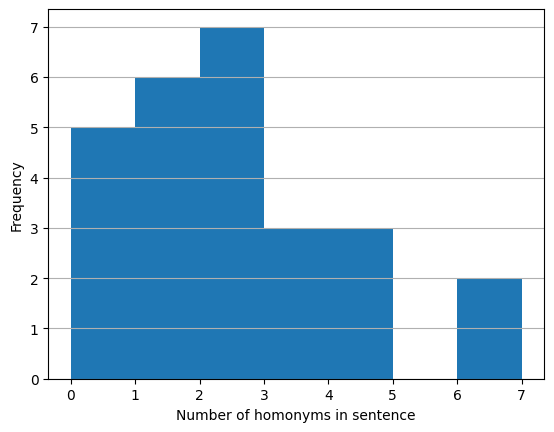

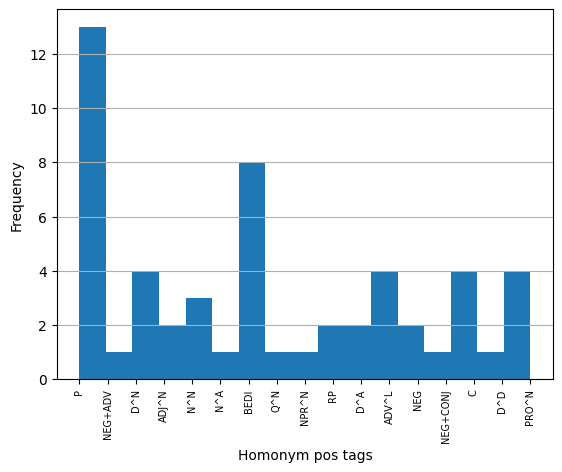

In [20]:
homonymlist = homonym_histogram(modern_sentences)    


#5.2 code
"Draw another histogram illustrating the histogram of the tags associated to homonym word."
def pos_tag_histogram(sentences):
    tags = []
    occurance = []
    for sentence in sentences:
        for word in sentence:
            if word:
                if word[2] == True:
                    if word[1] in tags:
                        occurance[tags.index(word[1])] += 1
                    else:
                        tags.append(word[1])
                        occurance.append(1)
    plt.hist(x=tags,weights=occurance, bins=len(tags),alpha=1, rwidth=1)
    plt.grid(axis='y', alpha=1)
    plt.xlabel('Homonym pos tags')
    plt.ylabel('Frequency')
    plt.xticks(fontsize=7, rotation=90)
    plt.show()
    
pos_tag_histogram(homonymlist)

6.	We would like to compare the phonetic of homonym and that of surrounding terms. For this purpose, use the “Fuzzy” library in python to generate the character string that identifies phonetically similar words (see fuzzy.Soundex (d) statement where d is the length of the generated string, and then use edit distance to compute the phonetic similarity between two words. See an example of implementation at https://www.analyticsvidhya.com/blog/2017/01/ultimate-guide-to-understand-implement-natural-language-processing-codes-in-python/.  Use the size of “d” open to account for more fine tuned phonetic evaluations. Therefore use the phonetic evaluation to compute the i) the edit distance between homonyms (should follow the order they appear in the document – first homonym and the second closest, then between the second one and the third one, etc..). Calculate the mean and standard deviation of the calculated distances. ii) Repeat the edit distance phonetic calculus when considering the first and last token of each line of poem (excluding stopword). 

In [21]:
#task 6
import fuzzy
from fuzzywuzzy import fuzz

def phonetic_similarity_homonyms(homonymlist):
    soundex = fuzzy.Soundex(4)
    resultslist = []
    current = None
    for sentence in homonymlist:
        for word in sentence:
            if current == None and word[2] == True:
                current = word
            elif current != None and word[2] == True:
                soundex1 = soundex(current[0])
                soundex2 = soundex(word[0])
                ratio = fuzz.ratio(soundex1.lower(), soundex2.lower())
                resultslist.append((ratio, (current[0], word[0]), (current[1], word[1])))
                current = word
    return(resultslist)

def phonetic_similarity_firstlast(firstwordlist, lastwordlist):
    soundex = fuzzy.Soundex(4)
    resultslist = []
    for index, firstword in enumerate(firstwordlist):
        soundex1 = soundex(firstword)
        soundex2 = soundex(lastwordlist[index])
        ratio = fuzz.ratio(soundex1.lower(), soundex2.lower())
        resultslist.append((ratio, (firstword, lastwordlist[index]), index))
    return(resultslist)

def get_mean_and_std(similaritylist):
    similarities = []
    for i in similaritylist:
        similarities.append(i[0])
    if len(similarities) > 0:
        mean = sum(similarities) / len(similarities)
        standarddeviation = np.std(similarities)
    return(mean, standarddeviation)

firstwords, lastwords = first_and_last_words(sentences)
similaritylist = phonetic_similarity_homonyms(homonymlist)
similaritylist2 = phonetic_similarity_firstlast(firstwords, lastwords)
print(get_mean_and_std(similaritylist))
print(get_mean_and_std(similaritylist2))


(49.056603773584904, 20.582475687991916)
(31.678515007898895, 21.328472903717067)


7.	Explore the bigrams (words) generated by the corpus and consider the pair of tags associated to each bigram, write a script that identifies the most frequent pair of tags and the less frequent pair at each line of poem. Determine the variation of these two pairs across all lines of the poem using the same concept as tag coherence of 3). 

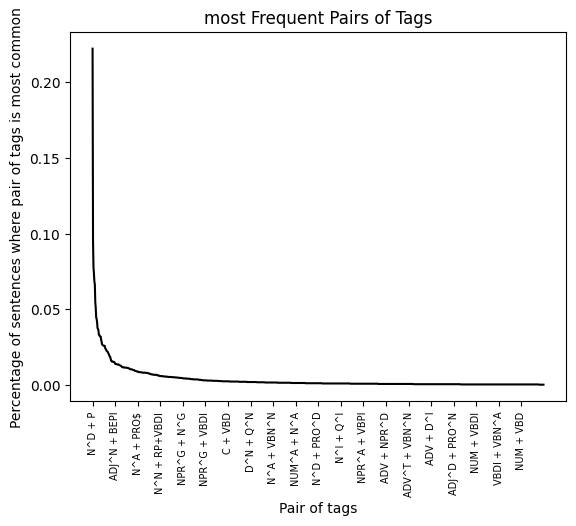

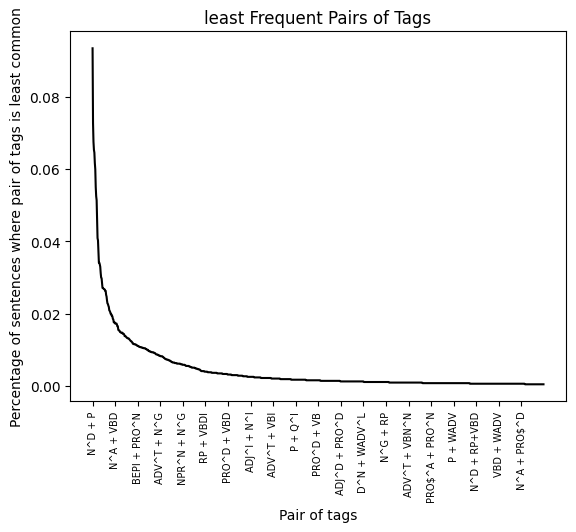

In [22]:
def get_bigrams(sentences):
    bigramlist = []
    for sentence in sentences:
        bigramlist.append(list(nltk.bigrams(sentence)))
    return(bigramlist)
def bigram_tags(bigramlist):
    mostfreqtags = []
    leastfreqtags = []
    for sentence in bigramlist:
        tagpairs = []
        for bigram in sentence:
            tagpair = (bigram[0][1], bigram[1][1])
            sortedtagpair = sorted(tagpair)
            tagpairstring = " + ".join(sortedtagpair)
            tagpairs.append(tagpairstring)
        counts = Counter(tagpairs)
        ordered = counts.most_common()
        if len(ordered) > 0:
            highestfreq = ordered[0][1]
            lowestfreq = ordered[-1][1]
            senthighestfreq = []
            sentlowestfreq = []
            for tag in ordered:
                if tag[1]==highestfreq:
                    senthighestfreq.append(tag[0])
                elif tag[1]==lowestfreq:
                    sentlowestfreq.append(tag[0])
            mostfreqtags.append(senthighestfreq)
            leastfreqtags.append(sentlowestfreq)
    return(mostfreqtags, leastfreqtags)

def plot_tagpairs(tagpairs, text): 
    counts = Counter(tagpairs)
    ordered = counts.most_common()
    x = []
    y = []
    for i in ordered:
        x.append(i[0])
        y.append(i[1])
    
    plt.plot(x[0:500], y[0:500], color='black')
    plt.title("Occurrence of {type} tagpair".format(type = text))
    plt.xlabel("tagpair")
    plt.ylabel("occurrence")
    plt.show()
    
def get_tag_coherence(tagfreqlist):
    numofsent = len(tagfreqlist)
    flatlist = []
    for i in tagfreqlist:
        for j in i:
            flatlist.append(j)
    x = Counter(flatlist)
    ordered = x.most_common()
    percentages = []
    for i in ordered:
        percentages.append((i[0], i[1]/numofsent))
    return(ordered, percentages)

bigramlist = get_bigrams(sentences)
mostfreqtagpair, leastfreqtagpair = bigram_tags(bigramlist)
ordered, percentages = get_tag_coherence(mostfreqtagpair)
draw_coherenceplot(percentages, "most")
ordered, percentages = get_tag_coherence(leastfreqtagpair)
draw_coherenceplot(percentages, "least")

8.	Repeat 1-7, when using more modern poem corpus. You may consider list of ebook  http://www.gutenberg.org/   and select a poetry ebook of your choice.

The fitted straight line has equation y = -1.14x + 3.53


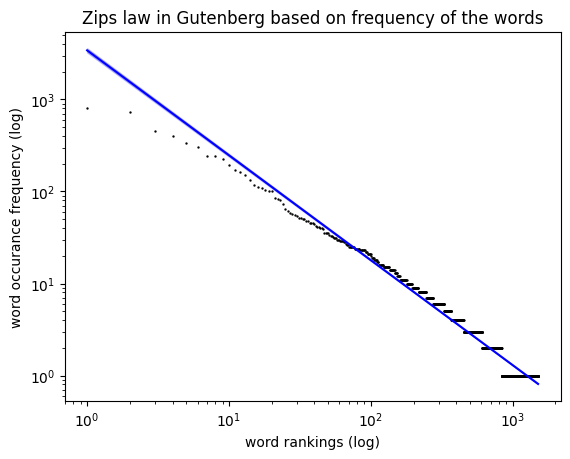

Tokens that are not between the 90% confidence limits: 96.81%


In [23]:
#task 8.1

import nltk
from nltk import word_tokenize, sent_tokenize
from urllib import request
from nltk.stem.snowball import SnowballStemmer

def get_raw(url):
    response = request.urlopen(url)
    raw = response.read().decode('utf8')
    raw = raw[raw.find("Almustafa"):raw.rfind("*** END OF THE PROJECT GUTENBERG EBOOK THE PROPHET ***")] 
    tokens = nltk.wordpunct_tokenize(raw)

    return tokens

def clean_raw(tokens):
    text = nltk.Text(tokens)
    words = [w.lower() for w in text]
    stemmer = SnowballStemmer("english")
    temp = []
    temp2 = []
    for token in words:
        token = token.lower().replace("_", "")
        
        if ord(token[0]) < 97 or ord(token[0]) > 122:
            #print(token)
            continue
        elif token[0] == "illustr":
            continue
        else:
            token = stemmer.stem(token)
            temp.append(token)
    return nltk.pos_tag(temp)

url = "https://gutenberg.org/cache/epub/58585/pg58585.txt"

raw_tokens = get_raw(url)
words3 = clean_raw(raw_tokens)
ranked_words2 = rank_words_occurance(words3)
x3,y3,words = rwords_to_lists(ranked_words2)
ylab3 = ["occurance frequency", "Gutenberg based on frequency of the words"]
draw_log_scale_reg_ci(x3,y3,ylab3)

The fitted straight line has equation y = -0.28x + 1.46


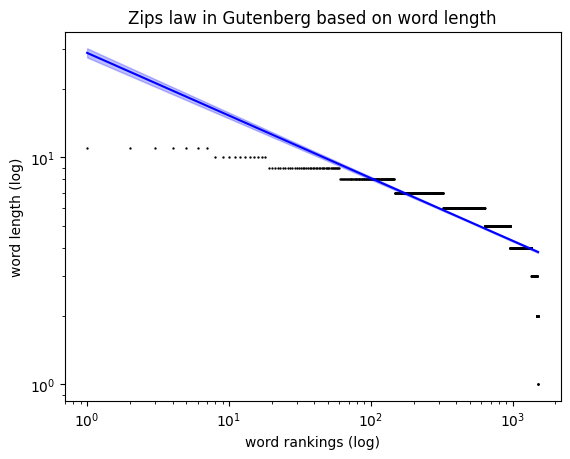

Tokens that are not between the 90% confidence limits: 92.57%


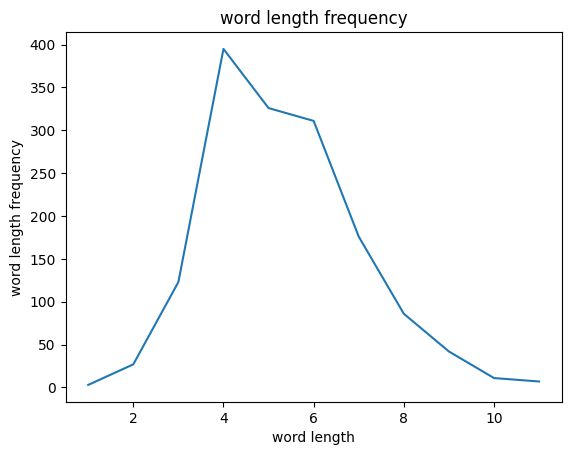

The fitted straight line has equation y = -1.97x + 3.12


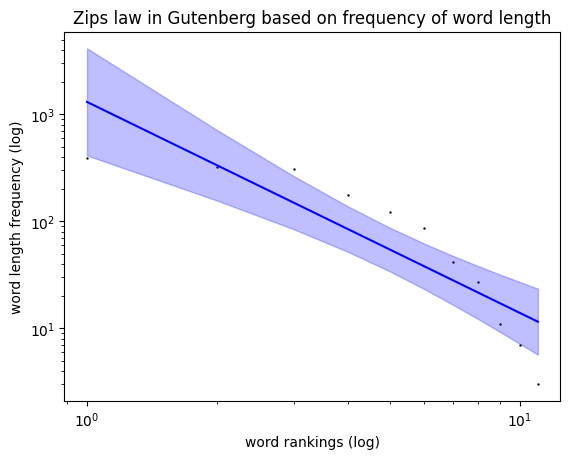

Tokens that are not between the 90% confidence limits: 63.64%


In [24]:
#8.2 code

x4,y4,words4 = rank_words_length(words3)
ylabel4 = ["length", "Gutenberg based on word length"]
draw_log_scale_reg_ci(x4,y4,ylabel4)

x4,y4,words4 = rank_words_length2(words3)
ylabel4 = ["length frequency", "Gutenberg based on frequency of word length"]
draw_log_scale_reg_ci(x4,y4,ylabel4)

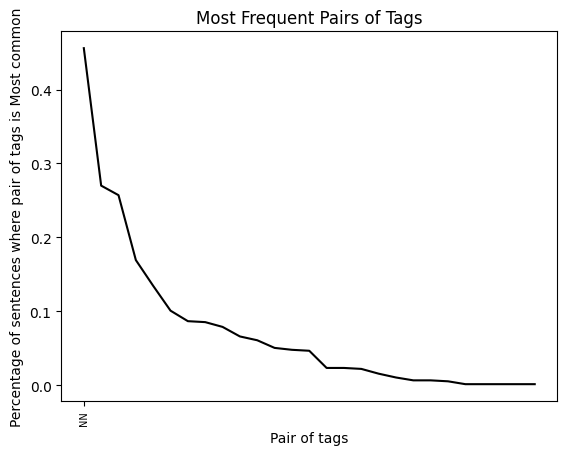

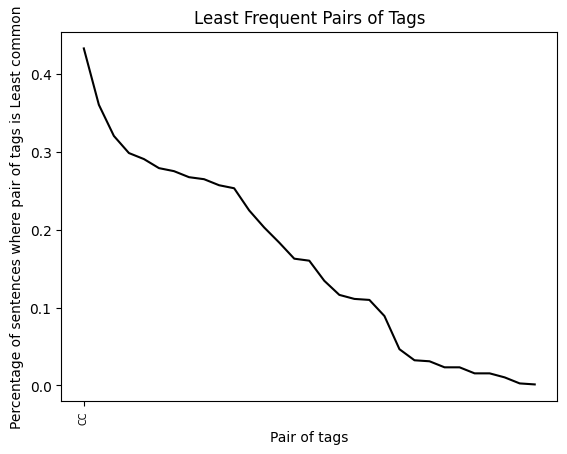

The fitted straight line has equation y = -1.96x + 2.89


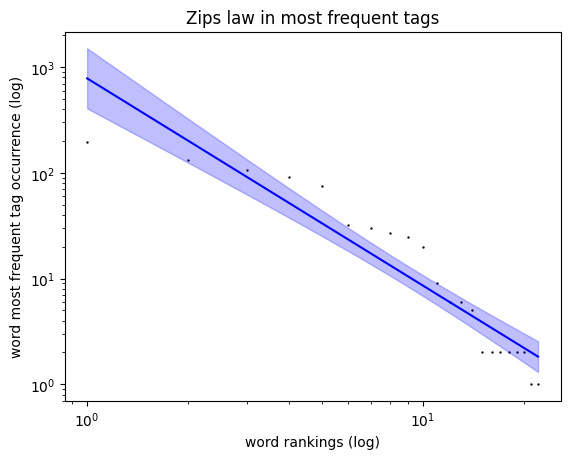

Tokens that are not between the 90% confidence limits: 68.18%
The fitted straight line has equation y = -1.41x + 2.62


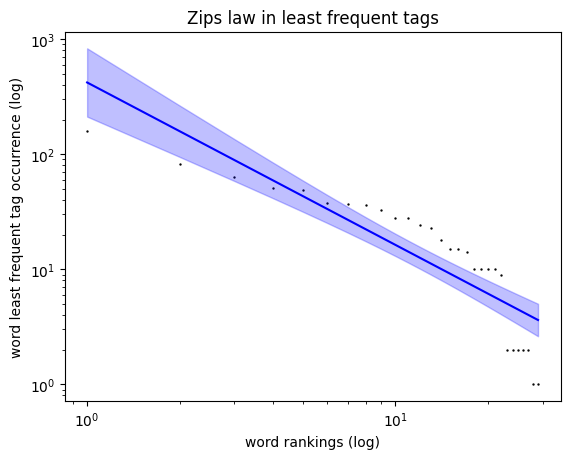

Tokens that are not between the 90% confidence limits: 86.21%


In [25]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
def get_raw_sent(url):
    response = request.urlopen(url)
    raw = response.read().decode('utf8').replace("\\r\\n\\r\\n",".").replace("”",". ").replace("_","").replace("“",". ")
    raw = raw[raw.find("Almustafa"):raw.rfind("*** END OF THE PROJECT GUTENBERG EBOOK THE PROPHET ***")]   
    raw = raw.replace("”",". ").replace("_","")
    raw = raw.replace(":",". ").replace(";",".")
    tokens = sent_tokenize(raw, language="english")
    return tokens

sents = get_raw_sent(url)
words_sents_unclean = []
words_sents = []
for sent in sents:
    temp = nltk.word_tokenize(sent)
    temp = nltk.pos_tag(temp)
    words_sents_unclean.append(temp)

stemmer = SnowballStemmer("english")
    
for sent in (words_sents_unclean):
    temp =[]
    for word in sent:
        temp2 = word
        x,y = temp2
        x = x.lower()
        x = x.replace("_","")
        x = stemmer.stem(x) ####
        
        
        temp2 = (x,y)
            
        if ord(temp2[0][0]) >= 97 and ord(temp2[0][0]) <= 122:
            if temp2[0] !=  "illustr":
                if len(temp2[0]) > 0:
                    temp.append(temp2)
    if len(temp) > 0:
        words_sents.append(temp)


mostfreq_g, leastfreq_g = get_tag_frequencies(words_sents)
orderedfreqs_g, percentages_g = get_tag_coherence(mostfreq_g)
draw_coherenceplot(percentages_g, "Most")
orderedfreqs_g, percentages_g = get_tag_coherence(leastfreq_g)
draw_coherenceplot(percentages_g, "Least")

ranked = rank_words_occurance(mostfreq_g)
tagx, tagy, wl = rwords_to_lists(ranked)
draw_log_scale_reg_ci(tagx,tagy, ["most frequent tag occurrence","most frequent tags"])

ranked = rank_words_occurance(leastfreq_g)
tagx, tagy, wl = rwords_to_lists(ranked)
draw_log_scale_reg_ci(tagx,tagy, ["least frequent tag occurrence", "least frequent tags"])

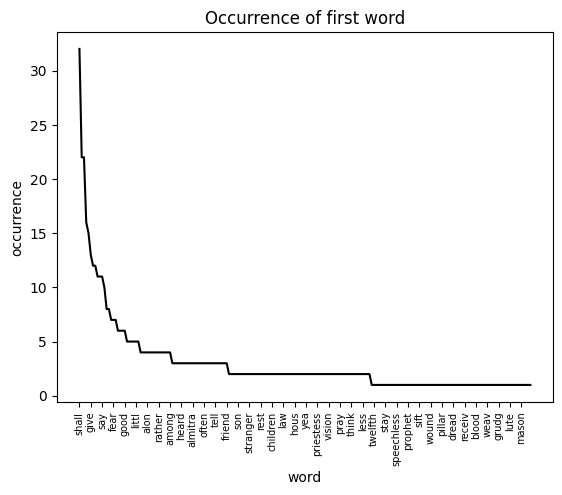

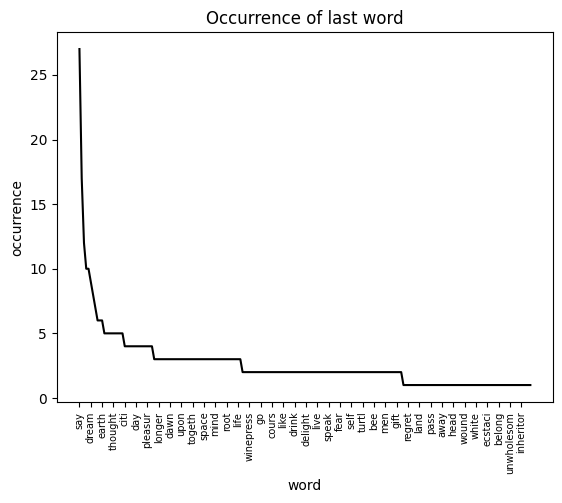

The fitted straight line has equation y = -0.94x + 2.29


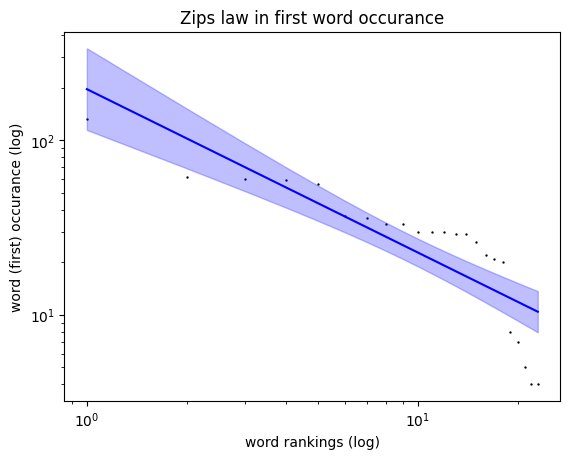

Tokens that are not between the 90% confidence limits: 73.91%
The fitted straight line has equation y = -0.89x + 2.26


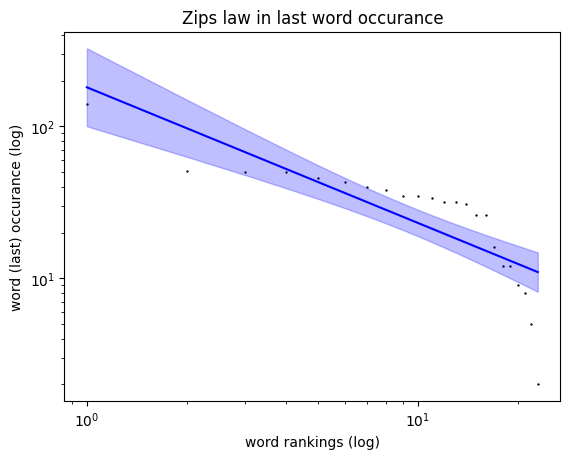

Tokens that are not between the 90% confidence limits: 65.22%


In [26]:
from nltk.corpus import stopwords

clean_tagged_sents = []
for sent in (words_sents):
    temp =[]
    for word in sent:
        if word[0] not in stopwords.words('english'):
            temp.append(word)
    clean_tagged_sents.append(temp)
  
firstwords_g, lastwords_g = first_and_last_words(clean_tagged_sents)
plot_first_last(firstwords_g, "first")
plot_first_last(lastwords_g, "last")

ranked = rank_words_occurance(firstwords_g)
tagx, tagy, wl = rwords_to_lists(ranked)
draw_log_scale_reg_ci(tagx,tagy, ["(first) occurance","first word occurance"])

ranked = rank_words_occurance(lastwords_g)
tagx, tagy, wl = rwords_to_lists(ranked)
draw_log_scale_reg_ci(tagx,tagy, ["(last) occurance","last word occurance"])

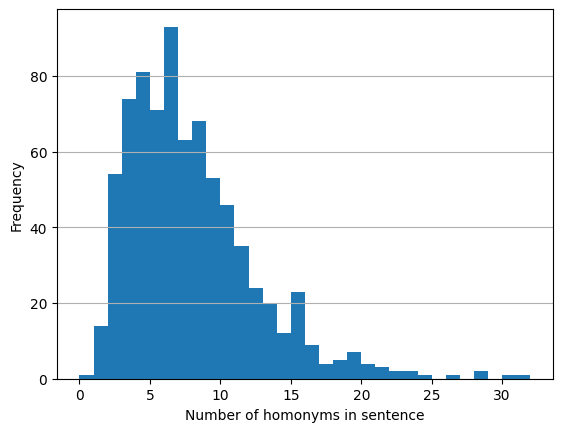

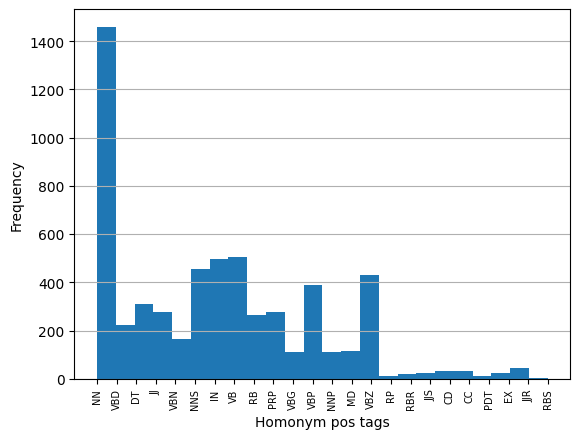

In [27]:
list_sentences_g = []

for sentence in words_sents:
    temp_sentence = []
    for word in sentence:
        temp = [word[0],word[1]]
        temp_sentence.append(temp)
    #if len(temp_sentence) > 50:
        #print(temp_sentence)
    list_sentences_g.append(temp_sentence)

result_sentences_g = homonym_histogram(list_sentences_g)
#8.5.2
pos_tag_histogram(result_sentences_g)

In [28]:
firstwords, lastwords = first_and_last_words(clean_tagged_sents)
similaritylist = phonetic_similarity_homonyms(result_sentences_g)
similaritylist2 = phonetic_similarity_firstlast(firstwords, lastwords)
print(get_mean_and_std(similaritylist))
print(get_mean_and_std(similaritylist2))

(38.528699861687414, 20.675944504638224)
(36.09314359637775, 25.4456093361974)


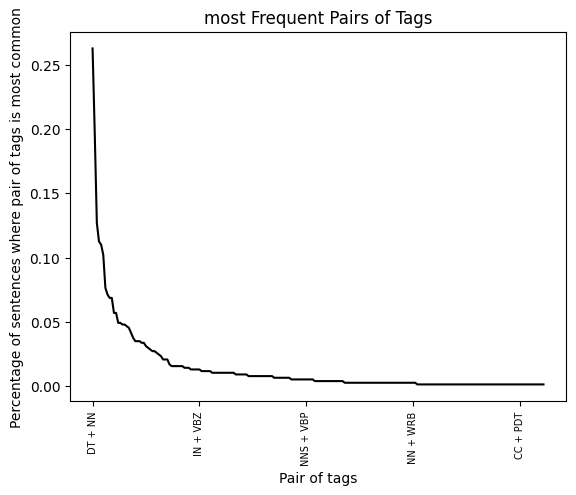

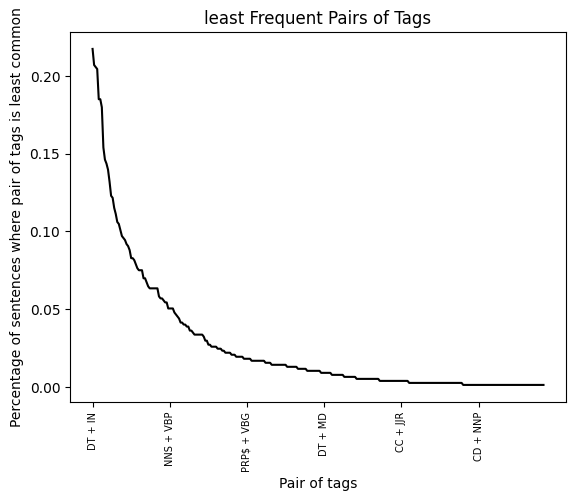

In [29]:
bigramlist = get_bigrams(words_sents)
mostfreqtagpair, leastfreqtagpair = bigram_tags(bigramlist)
ordered, percentages = get_tag_coherence(mostfreqtagpair)
draw_coherenceplot(percentages, "most")
ordered, percentages = get_tag_coherence(leastfreqtagpair)
draw_coherenceplot(percentages, "least")

9.	Draw wordclouds for most similar phonetic lines in both corpus.  

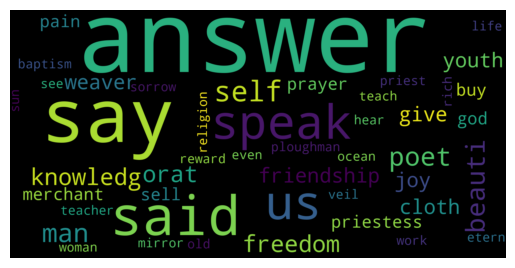

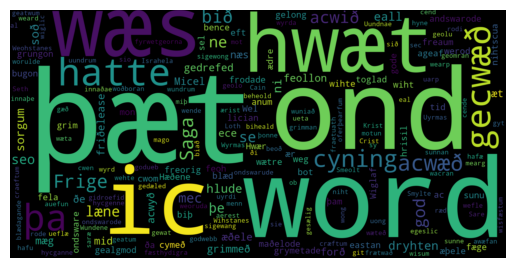

In [30]:
#9 code
import fuzzy
from fuzzywuzzy import fuzz
import itertools
from wordcloud import WordCloud

def get_ratios(sents):
    listofsentences = []
    soundex = fuzzy.Soundex(4)
    for index, sentence in enumerate(sents):
        soundexsentence = ""
        for word in sentence:
            soundexsentence += soundex(word[0])
        listofsentences.append((soundexsentence[0:-1], index))
    listofratios = []
    for sent1, sent2 in itertools.combinations(listofsentences, 2):
        if sent1[0].lower() != sent2[0].lower():
            ratio = fuzz.ratio(sent1[0].lower(), sent2[0].lower())
            listofratios.append((ratio, sent1[1], sent2[1]))
    return(listofratios)

def create_wordcloud(listofratios, sentences):
    toptenmostsimilar = sorted(listofratios, reverse=True)[0:100]
    stringofwords = ""
    for i in toptenmostsimilar:
        sent1 = sentences[i[1]]
        sent2 = sentences[i[2]]
        for word in sent1:
            convertedword = word[0]
            if "+d" in word[0]:
                convertedword = convertedword.replace("+d", "ð" )
            if "+t" in word[0]:
                convertedword = convertedword.replace("+t", "þ" )
            if "+a" in word[0]:
                convertedword = convertedword.replace("+a", "æ" )
            stringofwords += convertedword + " "
        for word in sent2:
            convertedword = word[0]
            if "+d" in word[0]:
                convertedword = convertedword.replace("+d", "ð" )
            if "+t" in word[0]:
                convertedword = convertedword.replace("+t", "þ" )
            if "+a" in word[0]:
                convertedword = convertedword.replace("+a", "æ" )
            stringofwords += convertedword + " "
    wordcloud = WordCloud(collocations=False, width = 2000, height = 1000).generate(stringofwords)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()     
    
ratiolist = get_ratios(words_sents)
create_wordcloud(ratiolist, words_sents)
ratiolist2 = get_ratios(sentences)
create_wordcloud(ratiolist2, sentences)

10.	Use appropriate literature of corpus linguistic literature to justify your findings and comment on the obtained results. Also, comment on the limitations and structural weakness of the data processing pipeline.   